<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataMinig/blob/main/20231108/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データマイニング第7回（2023/11/8）

#本日の講義の目的

クラスタリング手法に関する説明を行う



## 本日の講義の資料

以下のサイトに保存してある。

https://github.com/yajima-yasutoshi/DataMinig/tree/main/20231108

## 準備

In [ ]:
# インストール
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=6a7b8f366e83fbd329e5e5026616fa1b2946b876acd917e8c27697f31e3d53f2
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


## 必要なライブラリーのインポート

In [ ]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# Kmeans法


kmeans法を使うためには、sklearn というデータ分析ライブラリーを用いる。
詳しい使い方は以下のリンクを参照

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

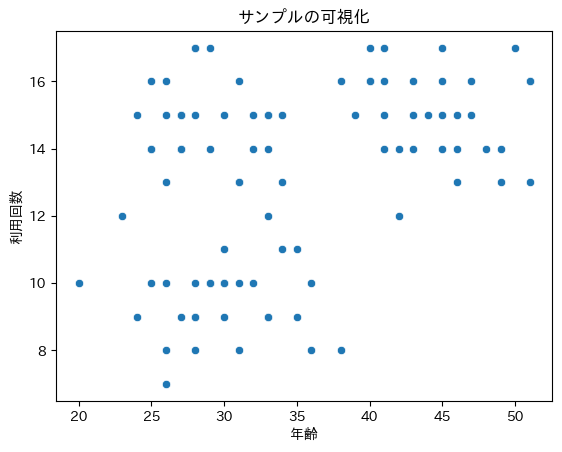

In [ ]:

# 読み込むファイルを指定する
file_path = '/content/drive/MyDrive/周南公立大学/講義/データマイニング/データ/利用回数.xlsx'
# data という変数に読み込む
df = pd.read_excel(file_path)

# 必要なデータをXにセットする
X = df[['年齢','利用回数']]


#結果の可視化（seabornを使用）
sns.scatterplot(x='年齢', y='利用回数', data=X)
plt.title('サンプルの可視化')
plt.show()

## クラスタリングの実行手順

In [ ]:
# クラスタリングに必要なライブラリーのインポート
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### データを標準化する。
 クラスタリングを実行する前にデータを**標準化**し、
 データの大きさを平均 0、分散 1 に変換する必要がある。

<Axes: title={'center': '変換前'}, xlabel='年齢', ylabel='利用回数'>

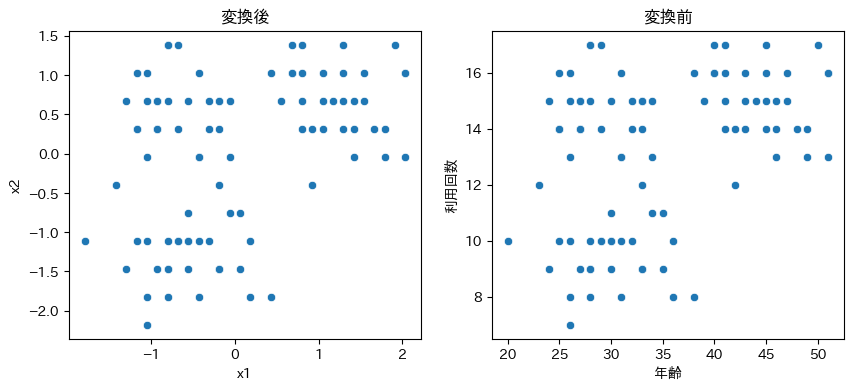

In [ ]:
# データの前処理
# 準備のための命令
scaler = StandardScaler()

# 標準化の実施
# 標準化後のデータを再びXにセットする
X = scaler.fit_transform(X)
X = pd.DataFrame( X, columns=['x1','x2'])


#
# 標準化の確認
# 省略可能
fig, (ax1, ax2) = plt.subplots( 1, 2 , figsize=(10,4))

ax1.set_title("変換後")
#sns.histplot(X[:,0], ax=ax1)
sns.scatterplot(data=X, x='x1', y='x2', ax=ax1)

ax2.set_title("変換前")
#sns.histplot(df['年齢'], ax=ax2)
sns.scatterplot(data=df, x='年齢', y='利用回数', ax=ax2 )

### クラスタリングの実行

In [ ]:
# 最適なクラスタ数を3であると仮定
best_n_clusters = 3
kmeans = KMeans(n_clusters=best_n_clusters, init='k-means++', max_iter=300, n_init='auto')

kmeans.fit(X)

# クラスタラベルをデータフレームに追加
df['cluster'] = kmeans.labels_

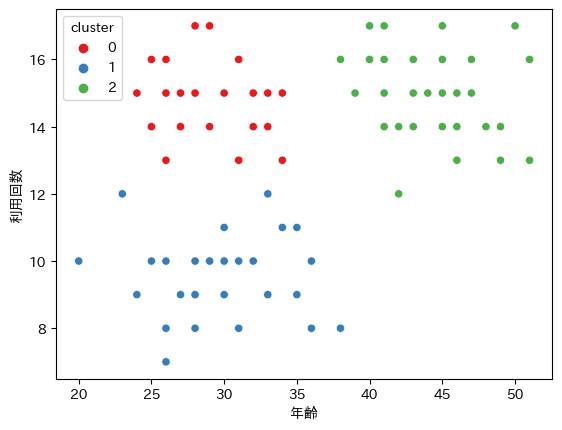

In [ ]:
# 結果の可視化（seabornを使用）
sns.scatterplot(x='年齢', y='利用回数', hue='cluster', data=df, palette='Set1')
plt.show()

In [ ]:
 df[['年齢','利用回数','cluster']].groupby('cluster').agg(['mean'])

,年齢,利用回数
,mean,mean
cluster,,
0,28.793103,14.758621
1,29.800000,9.533333
2,44.483871,15.032258


In [ ]:
# クラスタの中心からの距離の総和
kmeans.inertia_


35.10467947888096

### エルボー法

クラスタ数を決める方法として、エルボー法が使われる。

クラスタ数を変化させながら、クラスタ中心からの距離の長さの和を計算し
グラフ化する。
グラフの減少度合いが変化し始めるところを、最適なクラスター数として採用する。

In [ ]:
# Elbow Methodによるハイパーパラメータチューニング
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto')
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

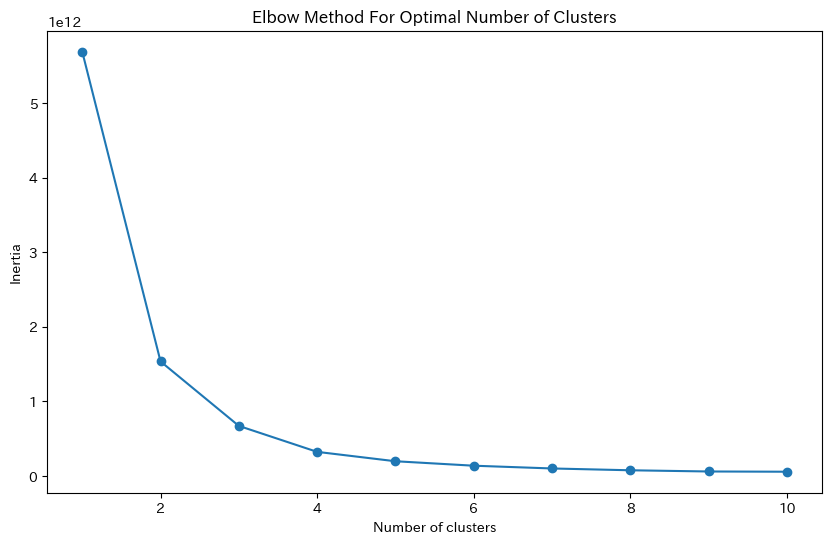

In [ ]:
# エルボー図のプロット
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

<Axes: xlabel='Num of clusters', ylabel='Inertia'>

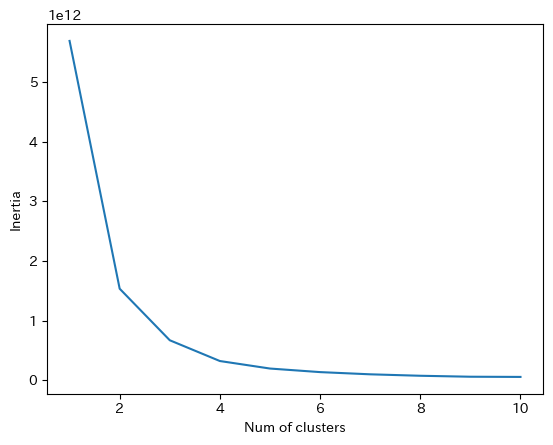

In [ ]:
elbow = pd.DataFrame( inertia, columns = ['Inertia'])
elbow['Num of clusters'] = range(1,11)
sns.lineplot(data = elbow, x='Num of clusters', y= 'Inertia')

# マーケティングデータを使った例

## データの準備
Kaggle のサイトより、「Shop Customer Data」を利用する。
各自でダウンロードして使います。必要な手順は以下の通り

1. Kaggle より、「Shop Customer Data」をPCにダウンロードする。 (https://www.kaggle.com/datasets/datascientistanna/customers-dataset)
1. PCで、ダウンロードしたファイルを解凍し、customer.csvファイルを保存する。
1. Google Driveのアップロード
1. Google Colab でGoogle Drive をマウントする。



### データの概要

項目名 | 説明
-- | --
Customer ID |
Gender | 性別
Age    | 年齢
Annual Income | 年収
Spending Score | 小売店が付与した顧客のスコア
Profession | 職業
Work Experience - in years | 就業年数
Family Size | 家族人数

In [ ]:
# 読み込むファイルを指定する
file_path = '/content/drive/MyDrive/周南公立大学/講義/データマイニング/データ/Customers.csv'
# data という変数に読み込む
data = pd.read_csv(file_path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
# Select relevant features for profiling (e.g., age, income, spending habits)
selected_data = pd.DataFrame( data[['Age', 'Annual Income ($)', 'Spending Score (1-100)']])

In [ ]:
selected_data.head()

,Age,Annual Income ($),Spending Score (1-100)
0,19,15000,39
1,21,35000,81
2,20,86000,6
3,23,59000,77
4,31,38000,40


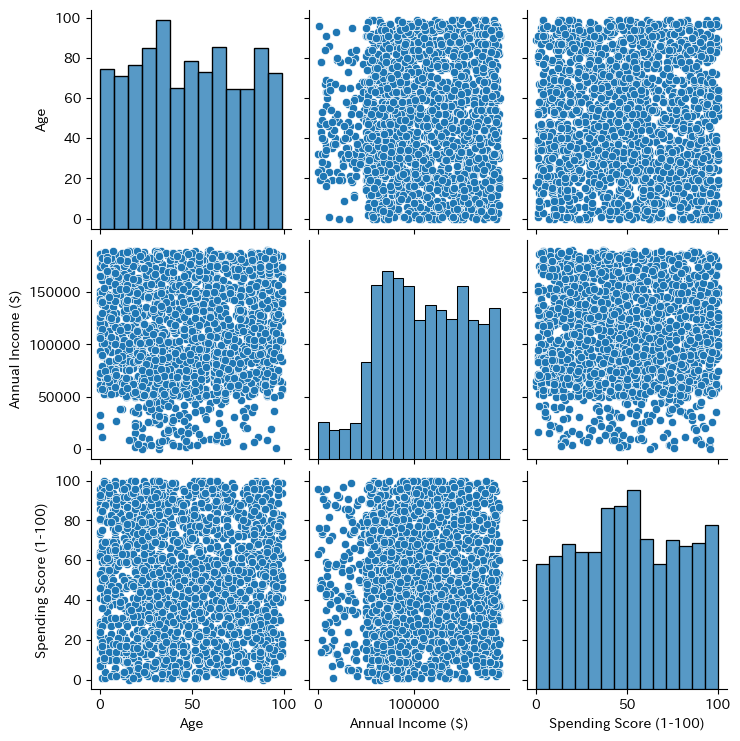

In [ ]:
sns.pairplot( data = selected_data )

### データの標準化

データの大きさに差がある場合には、データを平均0、分散1に変換する。

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_data)

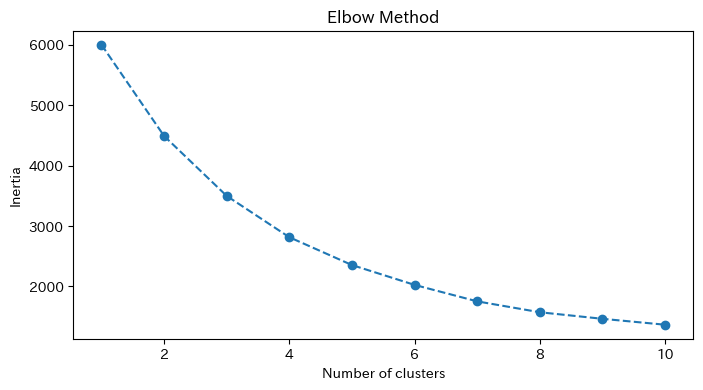

In [ ]:
# Determine the optimal number of clusters (Elbow method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to find the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<Axes: xlabel='Num of clusters', ylabel='Inertia'>

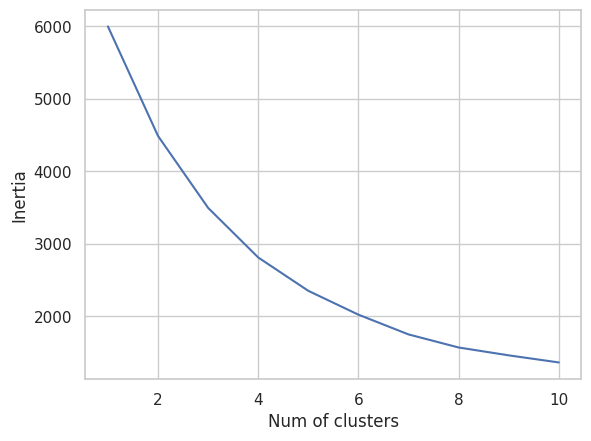

In [ ]:
elbow = pd.DataFrame( inertia, columns = ['Inertia'])
elbow['Num of clusters'] = range(1,11)
sns.set(style='whitegrid')
sns.lineplot(data = elbow, x='Num of clusters', y= 'Inertia')


In [ ]:
optimal_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_features)
# クラスタラベルをデータフレームに追加
selected_data['cluster'] = kmeans.labels_

# Add cluster labels to the original dataset
# selected_data['Cluster'] = cluster_labels


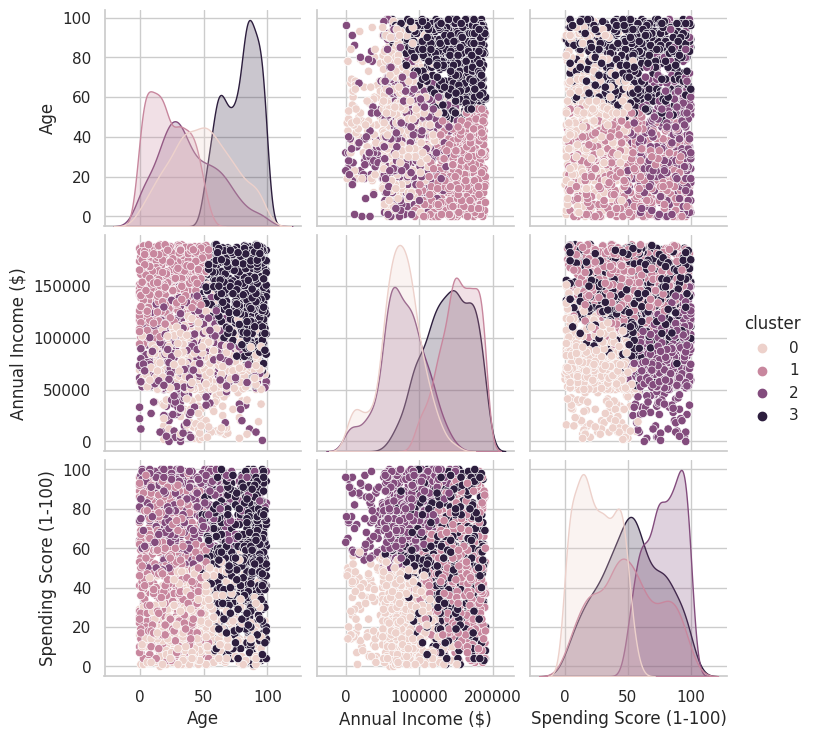

In [ ]:
sns.pairplot( data = selected_data, hue = 'cluster' )

In [ ]:
# Analyze customer profiles
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_profiles = pd.DataFrame(cluster_centers, columns=['Age', 'Income', 'SpendingScore'])

# Print customer profiles for each cluster
for cluster_num in range(optimal_clusters):
    print(f"Cluster {cluster_num } Profile:")
    print(cluster_profiles.iloc[cluster_num])
    print()

Cluster 0 Profile:
Age                 48.967054
Income           72894.393411
SpendingScore       25.114341
Name: 0, dtype: float64

Cluster 1 Profile:
Age                  22.243421
Income           153420.041667
SpendingScore        49.984649
Name: 1, dtype: float64

Cluster 2 Profile:
Age                 38.716776
Income           76787.313725
SpendingScore       78.618736
Name: 2, dtype: float64

Cluster 3 Profile:
Age                  78.627417
Income           138216.555360
SpendingScore        52.876977
Name: 3, dtype: float64



## 利用するデータ概要

Wineデータセットは、イタリアの同じ地域で栽培された3種類のワインに
含まれる成分を測定したデータ。
13の項目がある。

| 項目                          | 説明                                       |
|---------------------------------|--------------------------------------------|
| Alcohol（アルコール）           | ワインに含まれるアルコールの量。           |
| Malic Acid（リンゴ酸）          | ワインに含まれるリンゴ酸の量。             |
| Ash（灰分）                     | ワインの灰分の量。                         |
| Alcalinity of Ash（灰分のアルカリ度） | 灰分のアルカリ度。                   |
| Magnesium（マグネシウム）       | ワインに含まれるマグネシウムの量。         |
| Total Phenols（総フェノール）   | ワインに含まれるフェノール類の総量。       |
| Flavanoids（フラバノイド）      | ワインに含まれるフラバノイドの量。         |
| Nonflavanoid Phenols（非フラバノイドフェノール） | ワインに含まれる非フラバノイドフェノールの量。 |
| Proanthocyanins（プロアントシアニン） | ワインに含まれるプロアントシアニンの量。 |
| Color Intensity（色の強度）     | ワインの色の強度。                         |
| Hue（色相）                     | ワインの色相。                             |
| OD280/OD315 of Diluted Wines（希釈ワインのOD280/OD315） | 希釈されたワインのOD280/OD315の比率。 |
| Proline（プロリン）             | ワインに含まれるプロリンの量。             |

In [ ]:
from sklearn.datasets import load_wine
# データの読み込み
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [ ]:
# 相関行列を計算
correlation_matrix = df.corr().abs()

<Axes: >

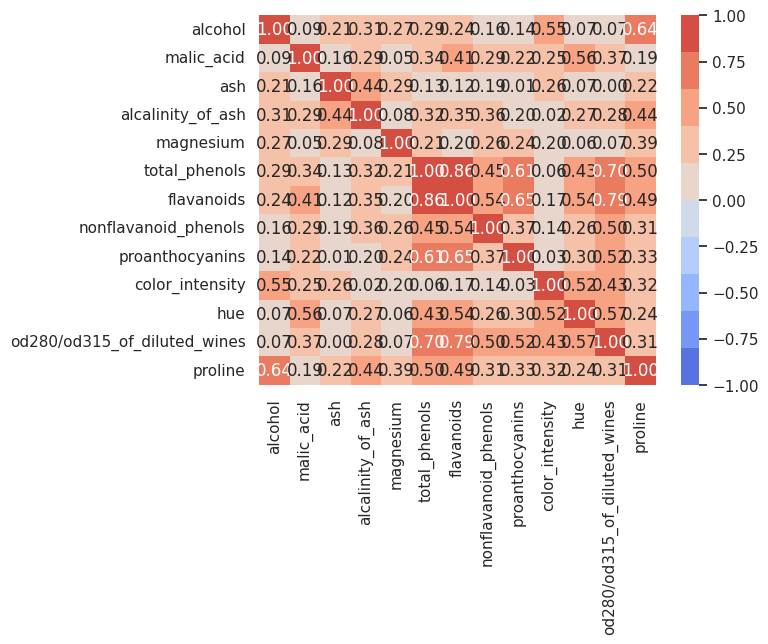

In [ ]:
sns.heatmap(correlation_matrix, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [ ]:
# 相関が0.5以上の変数を取得
high_corr_var = {}
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.5:
            colname = correlation_matrix.columns[i]
            high_corr_var[colname] = abs(correlation_matrix.iloc[i, j])

# 相関性の高い変数を削除
df.drop(columns=high_corr_var.keys(), inplace=True)

# 結果の表示
print("Remaining columns after removing highly correlated variables:")
print(df.columns)

Remaining columns after removing highly correlated variables:
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols'],
      dtype='object')


In [ ]:
# 前処理（データの正規化）
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
# Elbow Methodによるハイパーパラメータチューニング
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

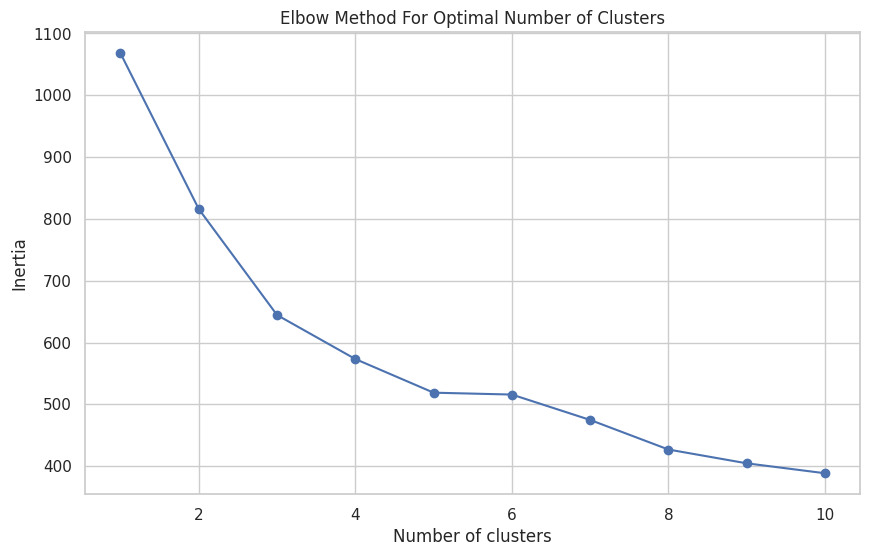

In [ ]:
# エルボー図のプロット
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [ ]:
# 最適なクラスタ数でKMeansクラスタリング（この例では、エルボーが3であると仮定）
best_n_clusters = 3  # エルボー図から選択
kmeans = KMeans(n_clusters=best_n_clusters, init='k-means++', max_iter=300, n_init='auto')
kmeans.fit(df_scaled)

# クラスタラベルをデータフレームに追加
df['cluster'] = kmeans.labels_

# 各クラスタの特徴を調査（平均値、標準偏差など）
cluster_summary = df.groupby('cluster').agg(['mean', 'std'])

# 結果の表示
print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
           alcohol           malic_acid                 ash            \
              mean       std       mean       std      mean       std   
cluster                                                                 
0        13.785690  0.461090   1.887069  0.555227  2.486034  0.213311   
1        12.313182  0.504936   1.686515  0.660244  2.173939  0.254691   
2        12.997593  0.629849   3.613148  0.945517  2.473519  0.222228   

        alcalinity_of_ash             magnesium            total_phenols  \
                     mean       std        mean        std          mean   
cluster                                                                    
0               17.691379  3.375780  108.344828  13.422359      2.875000   
1               19.198485  2.787858   92.439394  12.807604      2.184545   
2               21.794444  2.530077   99.425926  11.781985      1.807407   

                   
              std  
cluster            
0        0.329254  
1      

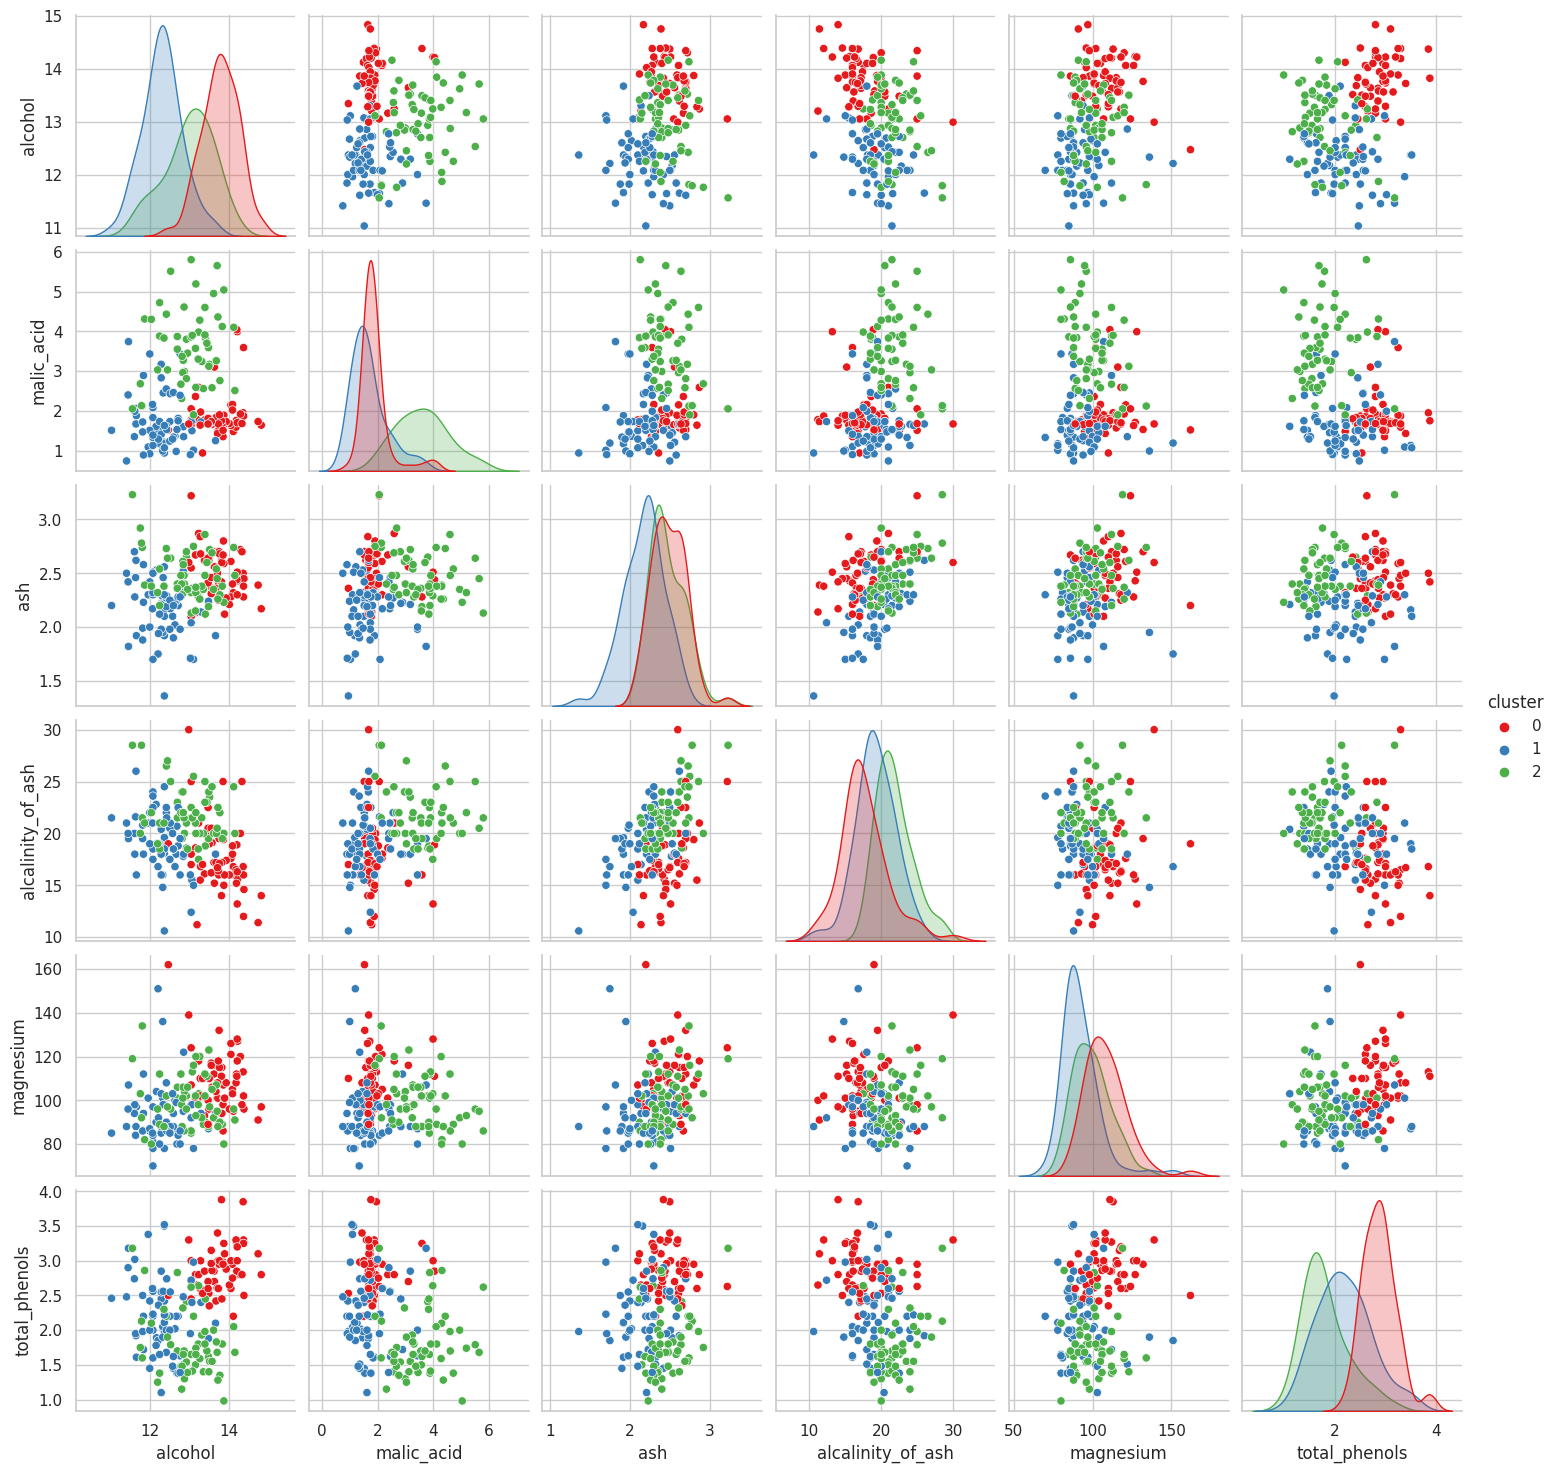

In [ ]:
sns.pairplot( data = df, hue='cluster', palette='Set1')

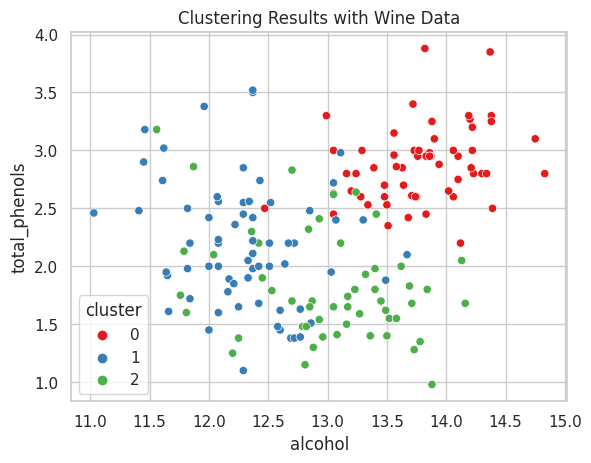

In [ ]:
# 結果の可視化（seabornを使用）
sns.scatterplot(x='alcohol', y='total_phenols', hue='cluster', data=df, palette='Set1')
plt.title('Clustering Results with Wine Data')
plt.show()

In [ ]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_profiles = pd.DataFrame(cluster_centers, columns=df.columns[0:6])

In [ ]:
cluster_profiles

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols
0,13.785690,1.887069,2.486034,17.691379,108.344828,2.875000
1,12.313182,1.686515,2.173939,19.198485,92.439394,2.184545
2,12.997593,3.613148,2.473519,21.794444,99.425926,1.807407
